# Inbasekaran Perumal 
# EC802
# Low power VLSI 

## Assignment 3
### Feb-16-2023

## NAND - Inverter realization

### Circuit diagram of NAND4 with inverter 

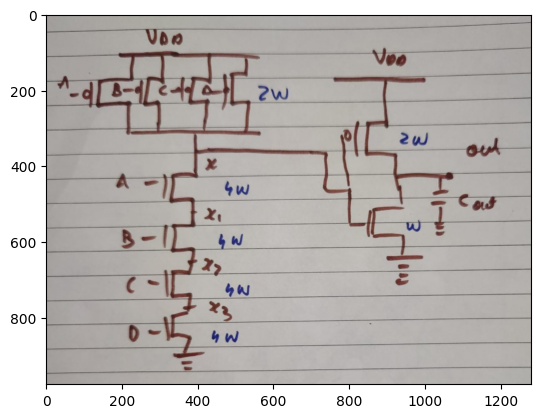

In [22]:
from matplotlib import image
import matplotlib.pyplot as plt

img = image.imread('./images/nand-inv.jpeg')
plt.imshow(img)

### Spice netlist 
```spice
*assignment3 NAND4
.include ./t14y_tsmc_025_level3.txt

mpa x a vdd vdd pmos l=1u w=4u
mpb x b vdd vdd pmos l=1u w=4u
mpc x c vdd vdd pmos l=1u w=4u
mpd x d vdd vdd pmos l=1u w=4u


mna x a x1 0 nmos l=1u w=2u
mnb x1 b x2 0 nmos l=1u w=2u
mnc x2 c x3 0 nmos l=1u w=2u
mnd x3 d 0 0 nmos l=1u w=2u

mpx out x vdd vdd pmos l=1u w=4u
mnx out x 0 0 nmos l=1u w=2u

.param C_OUT = 15f
.param VMAX = 3v


cout out 0 C_OUT

vdd vdd 0 dc VMAX
va a 0 dc pulse(0 VMAX 0 0.01n 0.01n 2n 4n)
vb b 0 dc pulse(0 VMAX 0 0.01n 0.01n 4n 8n)
vc c 0 dc pulse(0 VMAX 0 0.01n 0.01n 8n 16n)
vd d 0 dc pulse(0 VMAX 0 0.01n 0.01n 16n 32n)

.control
    * foreach vdd .01f .1f 1f
        tran 0.001 32n 
        
        * trise measurement 
        meas tran trise trig out val=0.1*VMAX rise=1 targ out val=0.9*VMAX rise=1
        * tfall measurement
        meas tran tfall trig out val=0.9*VMAX fall=1 targ out val=0.1*VMAX fall=1
        * high to low time 
        meas tran tphl trig a val=.5*VMAX rise=1 targ out val=0.5*VMAX fall=1
        * low to high time 
        meas tran tplh trig a val=.5*VMAX fall=1 targ out val=0.5*VMAX fall=1
        * propagation delay
        let tp=0.5*(tphl+tplh)
        * power calculation
        let power_vec=vdd*vdd#branch
        * static power
        meas tran spower AVG power_vec from=0 to=32n
        * dynamic power 
        let dpower=@cout[capacitance]*vdd*vdd

        print tp spower dpower
        *plot out a b c d 
        
        wrdata output/250/3v/and4_nand4 out a b c d tp spower dpower tfall trise
.endc
.end

```

## NAND - NOR realization

### Circuit diagram of NAND4- NOR4

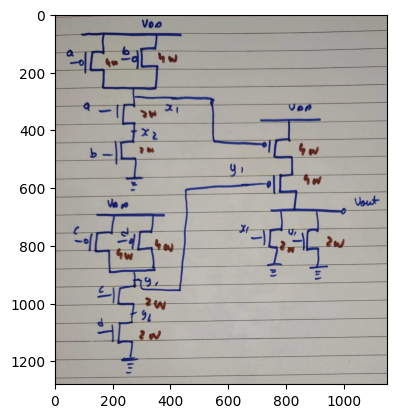

In [24]:
from matplotlib import image
import matplotlib.pyplot as plt

img = image.imread('./images/nand-nor.jpeg')
plt.imshow(img)

### Spice netlist 
```spice
*assignment3 NAND4
.include ./t14y_tsmc_009_level3.txt

mna x1 a y1 0 NMOS l=1u w=4u
mnb y1 b 0 0 NMOS l=1u w=4u
mnc x2 c y2 0 NMOS l=1u w=4u
mnd y2 d 0 0 NMOS l=1u w=4u
mnx1 out x1 0 0 NMOS l=1u w=2u
mnx2 out x2 0 0 NMOS l=1u w=2u
mpa x1 a vdd vdd PMOS l=1u w=4u
mpb x1 b vdd vdd PMOS l=1u w=4u
mpc x2 c vdd vdd PMOS l=1u w=4u
mpd x2 d vdd vdd PMOS l=1u w=4u
mpx1 y3 x1 vdd vdd PMOS l=1u w=8u
mpx2 out x2 y3 vdd PMOS l=1u w=8u

.param C_OUT = 15f
.param VMAX = 3v


cout out 0 C_OUT

vdd vdd 0 dc VMAX
va a 0 dc pulse(0 VMAX 0 0.01n 0.01n 2n 4n)
vb b 0 dc pulse(0 VMAX 0 0.01n 0.01n 4n 8n)
vc c 0 dc pulse(0 VMAX 0 0.01n 0.01n 8n 16n)
vd d 0 dc pulse(0 VMAX 0 0.01n 0.01n 16n 32n)

.control
    * foreach vdd .01f .1f 1f
        tran 0.001 32n 
        
        * trise measurement 
        meas tran trise trig out val=0.1*VMAX rise=1 targ out val=0.9*VMAX rise=1
        * tfall measurement
        meas tran tfall trig out val=0.9*VMAX fall=1 targ out val=0.1*VMAX fall=1
        * high to low time 
        meas tran tphl trig a val=.5*VMAX rise=1 targ out val=0.5*VMAX fall=1
        * low to high time 
        meas tran tplh trig a val=.5*VMAX fall=1 targ out val=0.5*VMAX fall=1
        * propagation delay
        let tp=0.5*(tphl+tplh)
        * power calculation
        let power_vec=vdd*vdd#branch
        * static power
        meas tran spower AVG power_vec from=0 to=32n
        * dynamic power 
        let dpower=@cout[capacitance]*vdd*vdd

        print tp spower dpower
        plot out a b c d 

        wrdata output/90/3v/nand-nor out a b c d tp spower dpower tfall trise
.endc
.end
```

## bash script to change VDD and run ngspice
```bash
#!/bin/bash

# Define the list of replacement values
replacements=(3 4 5 6 7 8 9)

# Loop through the replacement values and replace them in the file
for r in "${replacements[@]}"
do
  # Define the replacement string with the current value
  rv="$r""v"

  # Replace the value in the file
  sed -i "s/3v/$rv/g" and4_nand_nor.sim

  # Run ngspice with the modified file
  ngspice -b and4_nand_nor.sim

  # Revert the change in the file
  sed -i "s/$rv/3v/g" and4_nand_nor.sim
done
```

## MAIN CODE to plot the graphs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [8]:
vdd = np.arange(3,7,1)
vdd

array([3, 4, 5, 6])

In [9]:
data_90_nand_nor = [np.genfromtxt(f'./output/90/{i}v/and4_nand_nor.data') for i in vdd][:4]
data_250_nand_nor = [np.genfromtxt(f'./output/250/{i}v/and4_nand_nor.data') for i in vdd][:4]
data_90_nand = [np.genfromtxt(f'./output/90/{i}v/and4_nand4.data') for i in vdd][:4]
data_250_nand = [np.genfromtxt(f'./output/250/{i}v/and4_nand4.data') for i in vdd][:4]

### Plot of voltage vs Time

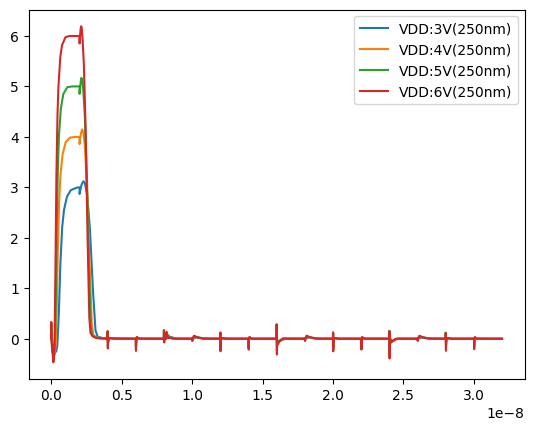

In [14]:
for i in range (len(data_250_nand_nor)):
    plt.plot(data_250_nand_nor[i][:,0], data_250_nand_nor[i][:,1], label=f'VDD:{vdd[i]}V(250nm)')

# add a legend
plt.legend()
plt.show()

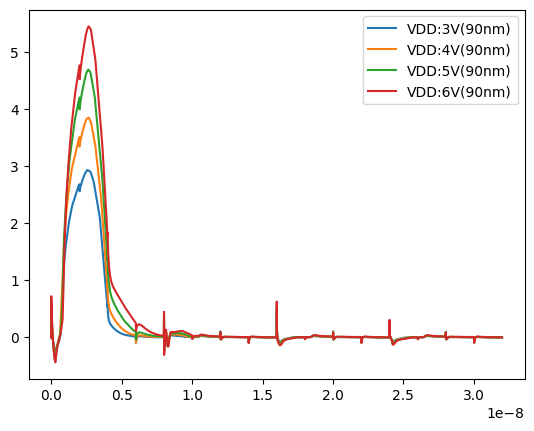

In [15]:
for i in range (len(data_90_nand_nor)):
    plt.plot(data_90_nand_nor[i][:,0], data_90_nand_nor[i][:,1], label=f'VDD:{vdd[i]}V(90nm)')

# add a legend
plt.legend()
plt.show()

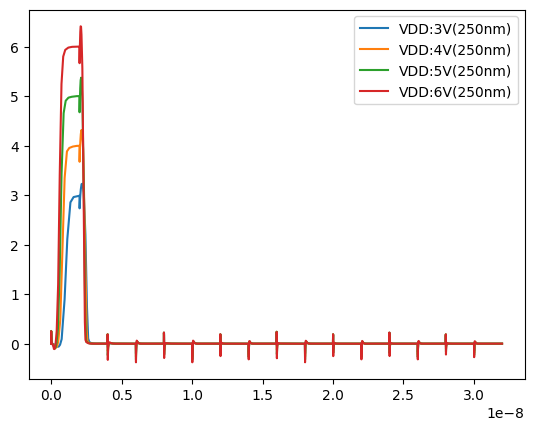

In [16]:
for i in range (len(data_250_nand)):
    plt.plot(data_250_nand[i][:,0], data_250_nand[i][:,1], label=f'VDD:{vdd[i]}V(250nm)')

# add a legend
plt.legend()
plt.show()

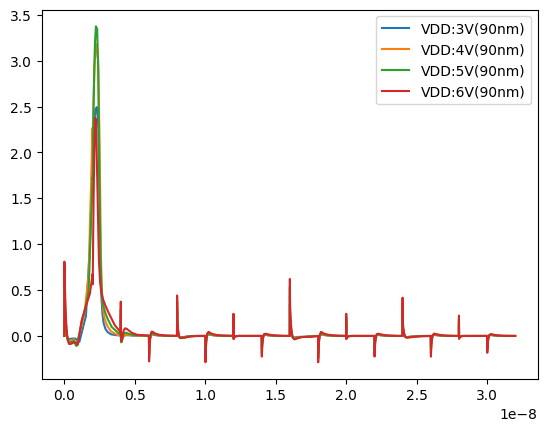

In [17]:
for i in range (len(data_90_nand)):
    plt.plot(data_90_nand[i][:,0], data_90_nand[i][:,1], label=f'VDD:{vdd[i]}V(90nm)')

# add a legend
plt.legend()
plt.show()

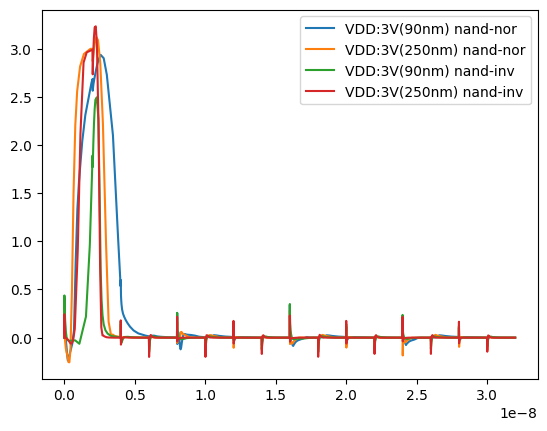

In [18]:
# 90 nm vs 250 nm
plt.plot(data_90_nand_nor[0][:,0], data_90_nand_nor[0][:,1], label=f'VDD:{vdd[0]}V(90nm) nand-nor')
plt.plot(data_250_nand_nor[0][:,0], data_250_nand_nor[0][:,1], label=f'VDD:{vdd[0]}V(250nm) nand-nor')
plt.plot(data_90_nand[0][:,0], data_90_nand[0][:,1], label=f'VDD:{vdd[0]}V(90nm) nand-inv')
plt.plot(data_250_nand[0][:,0], data_250_nand[0][:,1], label=f'VDD:{vdd[0]}V(250nm) nand-inv')

plt.legend()
plt.show()


- From the above graph we can infer that as the technology node decreases the propagation delay decreases. This is because as the technology node decreases the capacitance decreases and hence the propagation delay decreases.
- When we use two different realizations of the same gate, we can see that the propagation delay of the NAND-NOR realization is less than the AND-NAND realization. This is because the NAND-NOR realization has a lower capacitance than the AND-NAND realization.

### Plot of power static vs VDD

VDD: [3 4 5 6]
Power for 90nm Nand-Nor : [-0.00327649, -0.006643743, -0.009496653, -0.01192417]
Power for 250nm Nand-Nor : [-0.000530433, -0.00328589, -0.004877712, -0.009069093]
Power for 90nm Nand-Inv : [-0.001149181, -0.002699224, -0.00328077, -0.007143604]
Power for 250nm Nand-Inv : [0.0001909258, -0.0003501483, -0.002244907, -0.003258712]


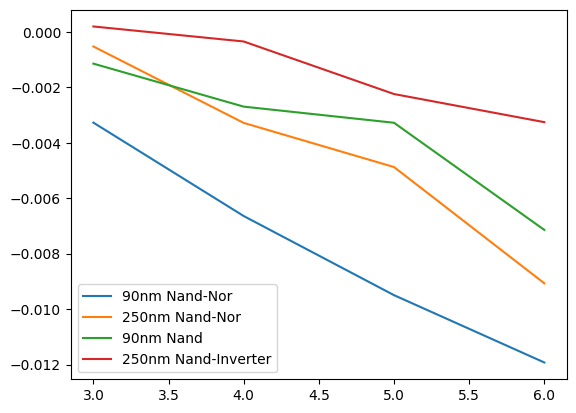

In [21]:
# plot power
p_90_nand_nor = [d[0,13] for d in data_90_nand_nor][:4]
p_250_nand_nor = [d[0,13] for d in data_250_nand_nor][:4]
p_90_nand = [d[0,13] for d in data_90_nand][:4]
p_250_nand = [d[0,13] for d in data_250_nand][:4]
print("VDD:", vdd)
print('Power for 90nm Nand-Nor :', p_90_nand_nor)
print('Power for 250nm Nand-Nor :', p_250_nand_nor)
print('Power for 90nm Nand-Inv :', p_90_nand)
print('Power for 250nm Nand-Inv :', p_250_nand)

plt.plot(vdd[:4], p_90_nand_nor[:4], label='90nm Nand-Nor')
plt.plot(vdd[:4], p_250_nand_nor[:4], label='250nm Nand-Nor')
plt.plot(vdd[:4], p_90_nand[:4], label='90nm Nand')
plt.plot(vdd[:4], p_250_nand[:4], label='250nm Nand-Inverter')
plt.legend()
plt.show()


- From the above graph we can infer that as the technology node decreases the static power decreases. This is because as the technology node decreases the capacitance decreases and hence the static power decreases.
- As we can see from the graph, the static power of the NAND-NOR realization is less than the AND-NAND realization. This is because the NAND-NOR realization has a lower capacitance than the AND-NAND realization.